# Early Data Exploration and Visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib.pyplot import figure

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
df_response = pd.DataFrame()
with open('C://Users/josep/Desktop/df_response.pkl','rb') as infile:
  df_response = pickle.load(infile)
df_response.head()

,sta01fips,mean_inc01_2007,mean_inc01_2009,inc01_diff
0,0.0,27063.448108,24905.738869,-2157.709239
1,1.0,16552.915581,19696.374882,3143.459301
2,2.0,36060.155183,38347.017376,2286.862193
3,4.0,25486.059158,24613.345036,-872.714122
4,5.0,20406.178589,20987.013518,580.834929


In [3]:
df_features = pd.DataFrame()
with open('C://Users/josep/Desktop/df_features.pkl','rb') as infile:
  df_features = pickle.load(infile)
df_features.head()

,sta01fips,White,Black,Am. Indian,Asian,Hispanic,Other,demo_sum,White%,Black%,Am. Indian%,Asian%,Hispanic%,Other%
0,0.0,56,6,0,4,0,12,78,0.717949,0.076923,0.000000,0.051282,0.000000,0.153846
1,1.0,67,178,0,0,0,1,246,0.272358,0.723577,0.000000,0.000000,0.000000,0.004065
2,2.0,28,0,1,0,0,0,29,0.965517,0.000000,0.034483,0.000000,0.000000,0.000000
3,4.0,201,11,8,1,4,54,279,0.720430,0.039427,0.028674,0.003584,0.014337,0.193548
4,5.0,317,102,17,1,0,0,437,0.725400,0.233410,0.038902,0.002288,0.000000,0.000000


In [4]:
# Income variables for California and Texas and Florida
df_temp = df_response.loc[df_response['sta01fips'].isin([6.0, 9.0, 48.0])]

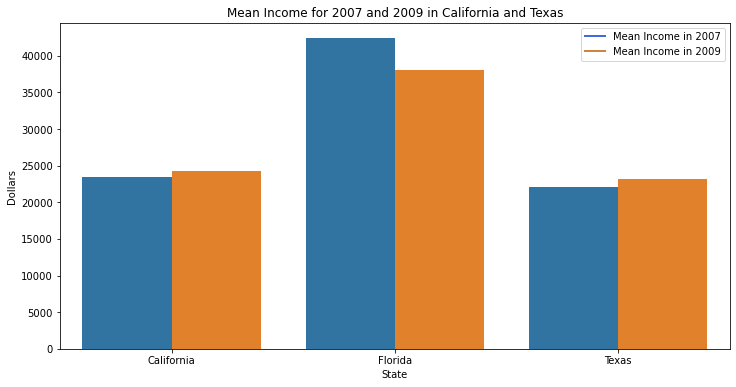

In [5]:
from matplotlib.lines import Line2D

# Melt data
df2 = df_temp.melt(id_vars="sta01fips", 
              value_vars=["mean_inc01_2007","mean_inc01_2009"],
              var_name='Income', value_name='Dollars')


# Could remove income difference
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='sta01fips', y='Dollars', hue='Income', ax=ax, data=df2)

# Label
plt.xlabel("State")
plt.ylabel("Dollars")
plt.title("Mean Income for 2007 and 2009 in California and Texas")

custom_lines = [Line2D([0], [0], color='royalblue', lw=2),
            Line2D([0], [0], color='peru', lw=2)]
plt.legend(custom_lines, ['Mean Income in 2007', 'Mean Income in 2009'])

ticklabs = [x.get_text() for x in ax.get_xticklabels()]
ticklabs[0] = 'California'
ticklabs[1] = 'Florida'
ticklabs[2] = 'Texas'
ax.set_xticklabels(ticklabs)

plt.show()

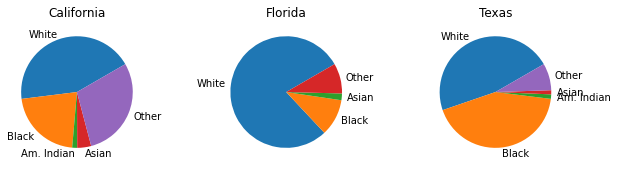

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

df_temp2 = df_features.loc[df_response['sta01fips'].isin([6.0, 9.0, 48.0])]
df_temp3 = df_temp2[["sta01fips","White","Black","Am. Indian","Asian","Hispanic","Other"]]

labels = ["California", "Florida", "Texas"]

for i, (idx, row) in enumerate(df_temp3.set_index('sta01fips').iterrows()):
    ax = axes[i]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30)
    ax.set_title(labels[i])

fig.subplots_adjust(wspace=.5)

In [7]:
df_fl_2017 = pd.DataFrame()
with open('C://Users/josep/Desktop/Stats170B_Project/df_fl_2017.pkl','rb') as infile:
  df_fl_2017 = pickle.load(infile)
df_fl_2017.head()

,fips_state_code,fips_county_code,week_end,product_code,product_group_code,product_module_code,sale,last_week_sale,last_week_sale_diff,units,last_week_units,last_week_units_diff,num_stores
2,12,1,20170121,0501_1272,0501,1272,7069.15,7724.64,-1355.85,338,360.0,-57.0,12
3,12,1,20170128,0501_1272,0501,1272,6543.51,7069.15,-655.49,328,338.0,-22.0,12
4,12,1,20170204,0501_1272,0501,1272,11155.50,6543.51,-525.64,524,328.0,-10.0,12
5,12,1,20170211,0501_1272,0501,1272,6749.40,11155.50,4611.99,347,524.0,196.0,12
6,12,1,20170218,0501_1272,0501,1272,6531.23,6749.40,-4406.10,323,347.0,-177.0,12


In [8]:
df_tx_2017 = pd.DataFrame()
with open('C://Users/josep/Desktop/Stats170B_Project/df_tx_2017.pkl','rb') as infile:
  df_tx_2017 = pickle.load(infile)
df_tx_2017.head()

,fips_state_code,fips_county_code,week_end,product_code,product_group_code,product_module_code,sale,last_week_sale,last_week_sale_diff,units,last_week_units,last_week_units_diff,num_stores
2,48,1,20170121,0501_1272,0501,1272,1627.41,1692.96,-1447.54,91,104.0,-87.0,2
3,48,1,20170128,0501_1272,0501,1272,1338.32,1627.41,-65.55,79,91.0,-13.0,2
4,48,1,20170204,0501_1272,0501,1272,1361.99,1338.32,-289.09,76,79.0,-12.0,2
5,48,1,20170211,0501_1272,0501,1272,4425.84,1361.99,23.67,266,76.0,-3.0,2
6,48,1,20170218,0501_1272,0501,1272,1639.04,4425.84,3063.85,96,266.0,190.0,2


In [9]:
df_fema_county = pd.DataFrame()
with open('C://Users/josep/Desktop/Stats170B_Project/df_fema_county.pkl','rb') as infile:
  df_fema_county = pickle.load(infile)
df_fema_county.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTY,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPB,HRCN_EXPP,HRCN_RISKS
0,21,Kentucky,115,Johnson,34.450138,2.0,0.017975,1.924008e+09,23355.998223,1.877326
1,21,Kentucky,117,Kenton,30.508475,1.0,0.006514,1.877337e+10,159719.999264,2.119373
2,21,Kentucky,119,Knott,38.628301,1.0,0.009440,1.169517e+09,16339.254872,1.194618
3,21,Kentucky,121,Knox,43.634214,1.0,0.011968,2.106327e+09,31609.754510,1.872874
4,21,Kentucky,123,Larue,31.533307,1.0,0.011348,1.221343e+09,14192.999924,1.045807


In [10]:
# Number of unique products in dataset
df_product_table = pd.read_csv("C://Users/josep/Desktop/Stats170B_Project/vicinitas_search_results.csv") 
df_product_table

df_product_table.rename(columns = {'product_code_str' : 'product_code'}, inplace = True)
print(len(df_product_table["product_module_descr"].unique()))

1069


In [11]:
# Filter data for certain products and certain counties in Texas 2017
cols = ["product_module_descr", "product_group_descr", "product_code"]

# Pick products
options = ["CIGARETTES", "SOFT DRINKS - CARBONATED", "WATER-BOTTLED", "COLD REMEDIES - ADULT", "BATTERIES"]

df_tx_2017_prod = pd.DataFrame()

df_tx_2017_prod = df_tx_2017.join(df_product_table[cols].set_index('product_code'), on='product_code')
df_tx_2017_prod = df_tx_2017_prod.loc[df_tx_2017_prod['product_module_descr'].isin(options)]

df_tx_2017_prod['week_end_date'] = pd.to_datetime(df_tx_2017_prod['week_end'], format='%Y%m%d')
df_tx_2017_prod["log_sale"] = np.log(df_tx_2017_prod["sale"])

# Pick counties
df_tx_2017_prod1 = df_tx_2017_prod[df_tx_2017_prod["fips_county_code"] == 7]
df_tx_2017_prod2 = df_tx_2017_prod[df_tx_2017_prod["fips_county_code"] == 409]
df_tx_2017_prod3 = df_tx_2017_prod[df_tx_2017_prod["fips_county_code"] == 15]


df_tx_2017_prod2.head()

C:\Users\josep\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fips_state_code,fips_county_code,week_end,product_code,product_group_code,product_module_code,sale,last_week_sale,last_week_sale_diff,units,last_week_units,last_week_units_diff,num_stores,product_module_descr,product_group_descr,week_end_date,log_sale
2,48,409,20170121,1503_1484,1503,1484,2556.99,2828.60,235.92,1234,1388.0,183.0,4,SOFT DRINKS - CARBONATED,CARBONATED BEVERAGES,2017-01-21,7.846586
3,48,409,20170128,1503_1484,1503,1484,2485.82,2556.99,-271.61,1187,1234.0,-154.0,4,SOFT DRINKS - CARBONATED,CARBONATED BEVERAGES,2017-01-28,7.818358
4,48,409,20170204,1503_1484,1503,1484,2778.09,2485.82,-71.17,1382,1187.0,-47.0,4,SOFT DRINKS - CARBONATED,CARBONATED BEVERAGES,2017-02-04,7.929519
5,48,409,20170211,1503_1484,1503,1484,2922.33,2778.09,292.27,1436,1382.0,195.0,4,SOFT DRINKS - CARBONATED,CARBONATED BEVERAGES,2017-02-11,7.980137
6,48,409,20170218,1503_1484,1503,1484,2695.77,2922.33,144.24,1277,1436.0,54.0,4,SOFT DRINKS - CARBONATED,CARBONATED BEVERAGES,2017-02-18,7.899439


In [12]:
def plot_gb_time_series(df, ts_name, gb_name, value_name, figsize=(20,7), title=None, hur=False):

    fig, ax = plt.subplots(figsize=figsize)
    for key, grp in df.groupby([gb_name]):
        ax = grp.plot(ax=ax, kind='line', x=ts_name, y=value_name, label=key)

    ax.autoscale_view()
    ax.legend(loc='best')
    _ = plt.xticks(rotation=60)
    _ = plt.grid()
    _ = plt.xlabel('')
    _ = plt.ylim(0, df[value_name].max() * 1.25)
    _ = plt.ylabel(value_name)
    
    if hur == True:
        _ = ax.axvline('2017-08-26', color='darkslategray', linestyle='--')
        _ = ax.axvline('2017-09-02', color='darkslategray', linestyle='--')
        _ = ax.axvline('2017-09-16', color='darkslategray', linestyle='--') 
        #_ = ax.text(x='04/24/2017', y=9.5, s="Hurricane Occurrences", size=13, weight='bold', c='darkslategray')
    
    _ = plt.ylabel("Log of Sales", fontsize=14)
    _ = [x.label.set_fontsize(13) for x in ax.xaxis.get_major_ticks()]
    
    if title is not None:
        _ = plt.title(title, size=15)
    _ = plt.show()

## Hurricane Disruption of Product Sales in Texas

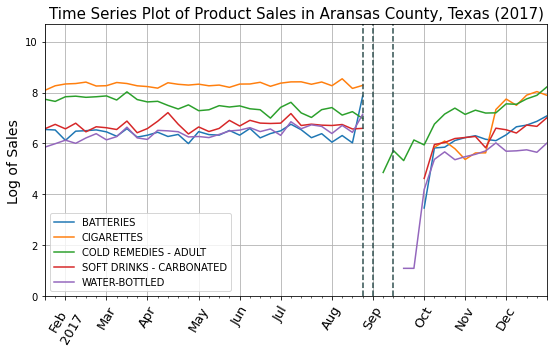

In [13]:
plot_gb_time_series(df_tx_2017_prod1, 'week_end_date', 'product_module_descr', 'log_sale',
                    figsize=(9, 5), title="Time Series Plot of Product Sales in Aransas County, Texas (2017)", hur=True)

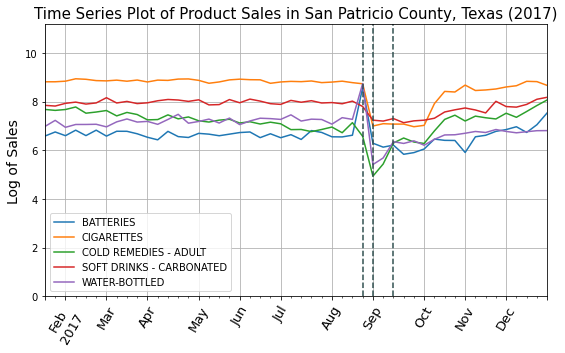

In [14]:
plot_gb_time_series(df_tx_2017_prod2, 'week_end_date', 'product_module_descr', 'log_sale',
                    figsize=(9, 5), title="Time Series Plot of Product Sales in San Patricio County, Texas (2017)", hur=True)

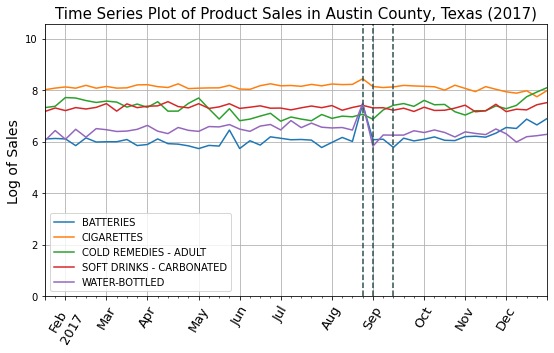

In [15]:
plot_gb_time_series(df_tx_2017_prod3, 'week_end_date', 'product_module_descr', 'log_sale',
                    figsize=(9, 5), title="Time Series Plot of Product Sales in Austin County, Texas (2017)", hur=True)

## Most sold product groups across Texas in 2017

In [16]:
df_tx_data2 = pd.DataFrame()
with open('C://Users/josep/Desktop/Stats170B_Project/df_tx_data2.pkl','rb') as infile:
  df_tx_data2 = pickle.load(infile)
df_tx_data2.head()

,sale,fips_state_code,fips_county_code,week_end,product_group_code,hurricane,last_week_sale,last_week_sale_diff,week_end_date,log_sale,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPP,HRCN_RISKS
0,1893.54,48,1,20170204,0501,0.0,1783.48,-353.08,204,7.546203,22.782814,3.0,0.018622,58025.693211,2.045053
1,5080.40,48,1,20170211,0501,0.0,1893.54,110.06,211,8.533145,22.782814,3.0,0.018622,58025.693211,2.045053
2,2068.19,48,1,20170218,0501,0.0,5080.40,3186.86,218,7.634429,22.782814,3.0,0.018622,58025.693211,2.045053
3,1766.81,48,1,20170225,0501,0.0,2068.19,-3012.21,225,7.476931,22.782814,3.0,0.018622,58025.693211,2.045053
4,1645.77,48,1,20170304,0501,0.0,1766.81,-301.38,304,7.405964,22.782814,3.0,0.018622,58025.693211,2.045053


In [17]:
temp3_df = pd.DataFrame()

# Picked most sold product groups in Texas
options = ['6018', '0503', '6012', '1507', '4510', '5002', '4507', '1503', '5001', '3002']
temp3_df = df_tx_data2.loc[df_tx_data2['product_group_code'].isin(options)]

# Group by product codes
pg = temp3_df.groupby(['product_group_code'])['sale'].sum()

# Order sales in descending order
pg = pg.sort_values(ascending=False)

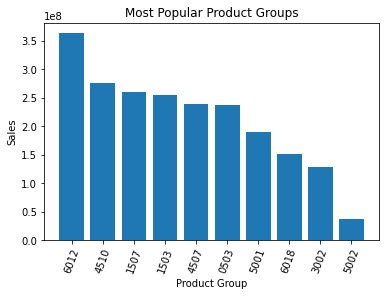

In [18]:
# Bar graph
plt.bar(pg.index, pg)

plt.xticks(rotation=70) 
plt.xlabel('Product Group') 
plt.ylabel('Sales') 
plt.title('Most Popular Product Groups')

plt.show()

## Heatmap for Product Sales and Hurricane Scores

In [19]:
df = pd.DataFrame(df_tx_data2)
selected_columns = df[['sale', 
                    'SOVI_SCORE',
                    'HRCN_EVNTS',
                    'HRCN_AFREQ',
                    'HRCN_EXPP',
                    'HRCN_RISKS']]

new_df = selected_columns.copy()

In [20]:
new_df.head()

,sale,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPP,HRCN_RISKS
0,1893.54,22.782814,3.0,0.018622,58025.693211,2.045053
1,5080.40,22.782814,3.0,0.018622,58025.693211,2.045053
2,2068.19,22.782814,3.0,0.018622,58025.693211,2.045053
3,1766.81,22.782814,3.0,0.018622,58025.693211,2.045053
4,1645.77,22.782814,3.0,0.018622,58025.693211,2.045053


Text(0.5, 1.0, 'Heatmap for FEMA Variables with Product Sales')

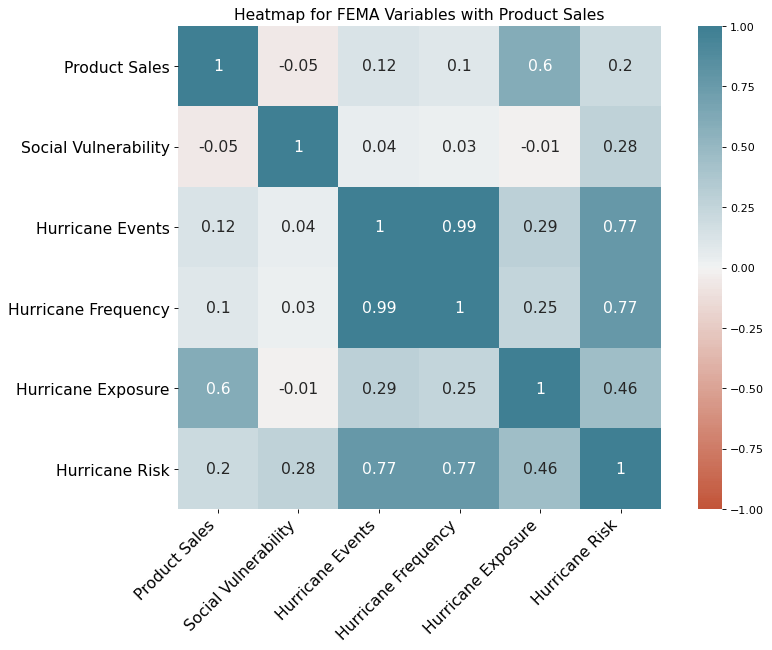

In [21]:
fig = figure(figsize=(12, 8), dpi=80)
x_axis_labels = ['Product Sales','Social Vulnerability', 'Hurricane Events', 'Hurricane Frequency', 'Hurricane Exposure', 'Hurricane Risk']
y_axis_labels = ['Product Sales','Social Vulnerability', 'Hurricane Events', 'Hurricane Frequency', 'Hurricane Exposure', 'Hurricane Risk']

corr = new_df.corr()
ax = sns.heatmap(
    corr.round(2), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    xticklabels=x_axis_labels,
    yticklabels=y_axis_labels,
    square=True,
    annot=True,
    annot_kws={"size": 14}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    fontsize=14,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=14,
);

ax.set_title("Heatmap for FEMA Variables with Product Sales", fontsize=14)

## Extended Heatmap

In [22]:
df = pd.DataFrame(df_tx_data2)
selected_columns = df[['sale',
                    'fips_county_code',
                    'product_group_code',
                    'last_week_sale',
                    'week_end_date',
                    'log_sale', 
                    'SOVI_SCORE',
                    'HRCN_EVNTS',
                    'HRCN_AFREQ',
                    'HRCN_EXPP',
                    'HRCN_RISKS']]

new_df2 = selected_columns.copy()
new_df2

,sale,fips_county_code,product_group_code,last_week_sale,week_end_date,log_sale,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPP,HRCN_RISKS
0,1893.54,1,0501,1783.48,204,7.546203,22.782814,3.0,0.018622,58025.693211,2.045053
1,5080.40,1,0501,1893.54,211,8.533145,22.782814,3.0,0.018622,58025.693211,2.045053
2,2068.19,1,0501,5080.40,218,7.634429,22.782814,3.0,0.018622,58025.693211,2.045053
3,1766.81,1,0501,2068.19,225,7.476931,22.782814,3.0,0.018622,58025.693211,2.045053
4,1645.77,1,0501,1766.81,304,7.405964,22.782814,3.0,0.018622,58025.693211,2.045053
...,...,...,...,...,...,...,...,...,...,...,...
390711,0.00,499,9599,0.00,1202,0.000000,45.959795,2.0,0.015273,41308.303197,4.458993
390712,5.00,499,9599,0.00,1209,1.609438,45.959795,2.0,0.015273,41308.303197,4.458993
390713,0.00,499,9599,5.00,1216,0.000000,45.959795,2.0,0.015273,41308.303197,4.458993
390714,0.00,499,9599,0.00,1223,0.000000,45.959795,2.0,0.015273,41308.303197,4.458993


Text(0.5, 1.0, 'Heatmap for Nielsen Consumption Variables')

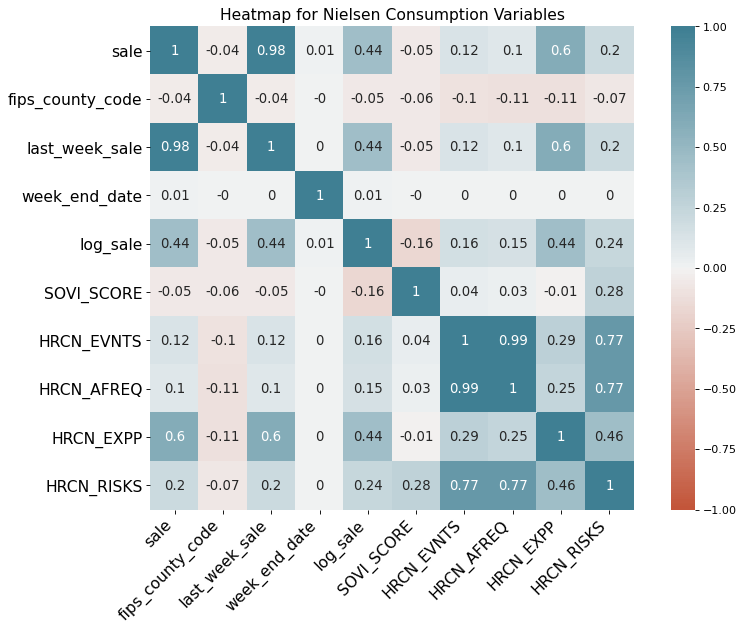

In [23]:
fig = figure(figsize=(12, 8), dpi=80)
#x_axis_labels = ['Product Sales','Social Vulnerability Score', 'Hurricane Events', 'Hurricane Frequency', 'Hurricane Exposure', 'Hurricane Risk']
#y_axis_labels = ['Product Sales','Social Vulnerability Score', 'Num of Hrcn Events', 'Annualized Hrcn Frequency', 'Hrcn Population Exposure', 'Hrcn Risk Score']

corr = new_df2.corr()
ax = sns.heatmap(
    corr.round(2), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    #xticklabels=x_axis_labels,
    #yticklabels=y_axis_labels,
    square=True,
    annot=True,
    annot_kws={"size": 12}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    fontsize=14,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=14,
);


ax.set_title("Heatmap for Nielsen Consumption Variables", fontsize=14)